## Loading of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from math import sqrt

In [2]:
keeling_curve = pd.read_excel('./Downloads/monthly_in_situ_co2_mlo (1).xls')
keeling_curve.head()

,monthly_in_situ_co2_mlo,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Ω,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.70,317.88,315.06,317.51,314.70


In [3]:
type(keeling_curve)

pandas.core.frame.DataFrame

## Cleaning of Data

In [4]:
keeling_curve.columns

Index(['monthly_in_situ_co2_mlo', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')

In [5]:
keeling_curve = keeling_curve.drop([0, 1,778,779], axis=0)

In [6]:
keeling_curve = keeling_curve[['monthly_in_situ_co2_mlo','Unnamed: 1','Unnamed: 8']]

In [7]:
keeling_curve

,monthly_in_situ_co2_mlo,Unnamed: 1,Unnamed: 8
2,1958,3,315.71
3,1958,4,317.45
4,1958,5,317.51
5,1958,6,317.26
6,1958,7,315.87
...,...,...,...
773,2022,6,420.68
774,2022,7,418.68
775,2022,8,416.76
776,2022,9,415.41


In [8]:
keeling_curve = keeling_curve.rename(columns={
    'monthly_in_situ_co2_mlo': 'Year',
    'Unnamed: 1': 'Months',
    'Unnamed: 8': 'Monthly mean CO2 concentration'
})

In [9]:
keeling_curve

,Year,Months,Monthly mean CO2 concentration
2,1958,3,315.71
3,1958,4,317.45
4,1958,5,317.51
5,1958,6,317.26
6,1958,7,315.87
...,...,...,...
773,2022,6,420.68
774,2022,7,418.68
775,2022,8,416.76
776,2022,9,415.41


In [10]:
# This method changes the object from dataframe object to dataseries object which we don't want


# keeling_curve = pd.read_excel(
#     './Downloads/monthly_in_situ_co2_mlo (1).xls',
# #     usecols=['monthly_in_situ_co2_mlo'],
#     skiprows=1)
# keeling_curve

In [11]:
keeling_curve.describe()

,Months,Monthly mean CO2 concentration
count,776.000000,776.000000
mean,6.500000,357.390129
std,3.444303,30.402324
min,1.000000,312.420000
25%,4.000000,329.685000
50%,6.500000,353.625000
75%,9.000000,382.020000
max,12.000000,420.770000


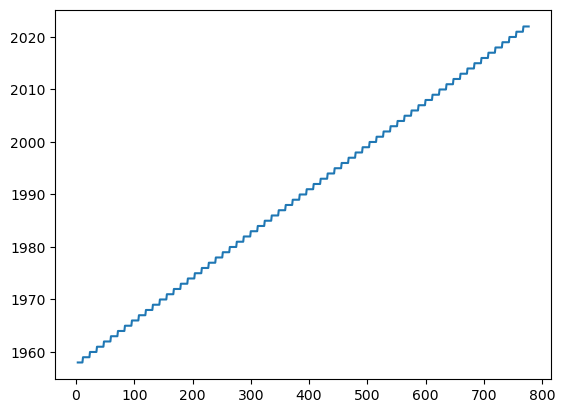

In [12]:
keeling_curve["Year"][1:].plot()
plt.show()

/Users/ss4338/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='Year'>

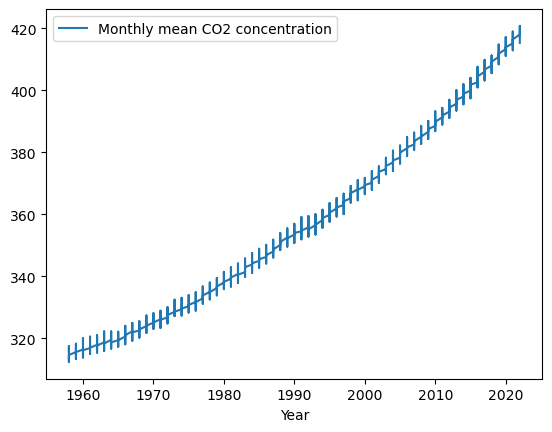

In [13]:
keeling_curve.plot(x = 'Year', y = 'Monthly mean CO2 concentration')

## Calculation of annual variation and mean annual variabilty

In [14]:
keeling_curve.head()

,Year,Months,Monthly mean CO2 concentration
2,1958,3,315.71
3,1958,4,317.45
4,1958,5,317.51
5,1958,6,317.26
6,1958,7,315.87


In [15]:
keeling_curve.isnull().sum()

Year                              0
Months                            0
Monthly mean CO2 concentration    0
dtype: int64

In [16]:
keeling_curve.iloc[0]

Year                                1958
Months                                 3
Monthly mean CO2 concentration    315.71
Name: 2, dtype: object

In [17]:
keeling_curve['Year']==1958

2       True
3       True
4       True
5       True
6       True
       ...  
773    False
774    False
775    False
776    False
777    False
Name: Year, Length: 776, dtype: bool

In [18]:
keeling_curve[keeling_curve['Year']==1958].index

Int64Index([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [19]:
index = keeling_curve.loc[keeling_curve['Year']==1958].index


In [20]:
keeling_curve.loc[index,'Monthly mean CO2 concentration']

2     315.71
3     317.45
4     317.51
5     317.26
6     315.87
7     314.93
8     313.21
9     312.42
10    313.33
11    314.67
Name: Monthly mean CO2 concentration, dtype: float64

In [21]:
ann_min = keeling_curve.loc[index, 'Monthly mean CO2 concentration'].min()
ann_min

312.42

In [22]:
ann_max = keeling_curve.loc[index, 'Monthly mean CO2 concentration'].max()
ann_max

317.51

In [23]:
# annual variabilty for 1958
annual_variation = ann_max - ann_min
annual_variation

5.089999999999975

In [24]:
unique_years = set(keeling_curve['Year'])
unique_years

{1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022}

In [25]:
index_list = []

for year in unique_years:
    indexes = keeling_curve[keeling_curve['Year'] == year].index
    index_list.append(indexes)

In [26]:
index_list

[Int64Index([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
 Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype='int64'),
 Int64Index([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], dtype='int64'),
 Int64Index([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype='int64'),
 Int64Index([48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], dtype='int64'),
 Int64Index([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], dtype='int64'),
 Int64Index([72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83], dtype='int64'),
 Int64Index([84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype='int64'),
 Int64Index([96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107], dtype='int64'),
 Int64Index([108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], dtype='int64'),
 Int64Index([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], dtype='int64'),
 Int64Index([132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143], dtype='int64'),
 Int64Index([144, 145, 146, 147, 148

In [27]:
annual_variability = []
for index in index_list:
    ann_var = keeling_curve.loc[index, 'Monthly mean CO2 concentration'].max(
    ) - keeling_curve.loc[index, 'Monthly mean CO2 concentration'].min()
    annual_variability.append(ann_var)

annual_variability

[5.089999999999975,
 4.960000000000036,
 6.199999999999989,
 5.589999999999975,
 5.599999999999966,
 6.259999999999991,
 5.5400000000000205,
 4.8700000000000045,
 5.979999999999961,
 5.75,
 5.319999999999993,
 5.600000000000023,
 5.060000000000002,
 5.569999999999993,
 5.230000000000018,
 5.2900000000000205,
 5.720000000000027,
 5.6299999999999955,
 5.939999999999998,
 5.589999999999975,
 5.4599999999999795,
 5.610000000000014,
 5.580000000000041,
 6.220000000000027,
 6.28000000000003,
 5.889999999999986,
 6.389999999999986,
 6.140000000000043,
 6.0400000000000205,
 5.739999999999952,
 5.470000000000027,
 5.860000000000014,
 6.189999999999998,
 7.189999999999998,
 6.649999999999977,
 6.579999999999984,
 5.829999999999984,
 6.019999999999982,
 5.970000000000027,
 6.600000000000023,
 5.389999999999986,
 6.5,
 5.210000000000036,
 6.060000000000002,
 5.300000000000011,
 5.359999999999957,
 6.569999999999993,
 5.829999999999984,
 6.1200000000000045,
 5.550000000000011,
 5.730000000000018,
 

In [28]:
# plt.plot(unique_years, annual_variability)
unique_years = list(unique_years)
print(type(unique_years))
print(type(annual_variability))

<class 'list'>
<class 'list'>


In [29]:
print(unique_years[0])
half_year = int((len(unique_years)-1)/2)

1958


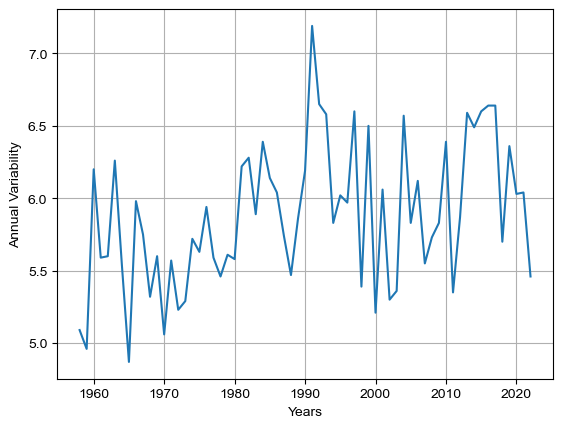

In [30]:
#ploting of two list using matplotlib
# plt.figure(facecolor = 'gray')
plt.plot(unique_years, annual_variability)
plt.xlabel('Years')
plt.ylabel('Annual Variability')
plt.style.use('seaborn')
plt.grid()
plt.show()


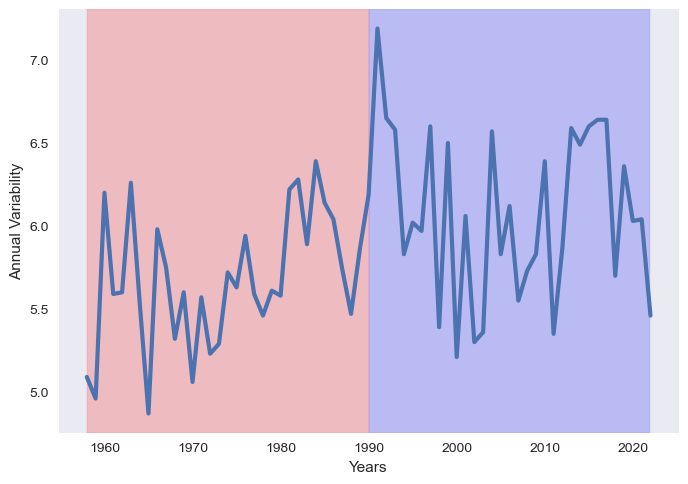

In [31]:
#ploting of two list using matplotlib
# plt.figure(facecolor = 'gray')
plt.plot(unique_years, annual_variability, linewidth = 3)
plt.xlabel('Years')
plt.ylabel('Annual Variability')
plt.style.use('seaborn')
plt.grid()
plt.axvspan(unique_years[0], unique_years[half_year], color='red', alpha=0.2)
plt.axvspan(unique_years[half_year], unique_years[len(unique_years)-1], color='blue', alpha=0.2)
plt.show()


In [32]:
annual_variability = np.array(annual_variability)
annual_variability

array([5.09, 4.96, 6.2 , 5.59, 5.6 , 6.26, 5.54, 4.87, 5.98, 5.75, 5.32,
       5.6 , 5.06, 5.57, 5.23, 5.29, 5.72, 5.63, 5.94, 5.59, 5.46, 5.61,
       5.58, 6.22, 6.28, 5.89, 6.39, 6.14, 6.04, 5.74, 5.47, 5.86, 6.19,
       7.19, 6.65, 6.58, 5.83, 6.02, 5.97, 6.6 , 5.39, 6.5 , 5.21, 6.06,
       5.3 , 5.36, 6.57, 5.83, 6.12, 5.55, 5.73, 5.83, 6.39, 5.35, 5.87,
       6.59, 6.49, 6.6 , 6.64, 6.64, 5.7 , 6.36, 6.03, 6.04, 5.46])

### Calculate the mean annual variability during the first half of the record and compare that to the value from the second half of the record.

In [33]:
first_half_mean_annual_variabilty = annual_variability[0:half_year].mean()
first_half_mean_annual_variabilty = np.repeat(first_half_mean_annual_variabilty, len(unique_years[0:half_year]))


In [34]:
first_half_mean_annual_variabilty

array([5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375,
       5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375,
       5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375,
       5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375,
       5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375,
       5.6709375, 5.6709375])

In [35]:
second_half_mean_annual_variabilty = annual_variability[half_year:len(unique_years)-1].mean()
second_half_mean_annual_variabilty = np.repeat(second_half_mean_annual_variabilty, len(unique_years[half_year:len(unique_years)-1]))

In [36]:
second_half_mean_annual_variabilty

array([6.099375, 6.099375, 6.099375, 6.099375, 6.099375, 6.099375,
       6.099375, 6.099375, 6.099375, 6.099375, 6.099375, 6.099375,
       6.099375, 6.099375, 6.099375, 6.099375, 6.099375, 6.099375,
       6.099375, 6.099375, 6.099375, 6.099375, 6.099375, 6.099375,
       6.099375, 6.099375, 6.099375, 6.099375, 6.099375, 6.099375,
       6.099375, 6.099375])

### below code is not working. why????

In [37]:
# plt.plot(unique_years, annual_variability, linewidth = 3)
# plt.axhline(y = first_half_mean_annual_variabilty, xmin = unique_years[0], xmax = unique_years[half_year], linewidth = 2, color = 'r')
# plt.axhline(y = second_half_mean_annual_variabilty, xmin = unique_years[half_year], xmax = unique_years[len(unique_years)-1], linewidth = 2, color = 'b')
# plt.xlabel('Years')
# plt.ylabel('Annual Variability')
# plt.style.use('seaborn')
# plt.grid()
# plt.axvspan(unique_years[0], unique_years[half_year], color='red', alpha=0.2)
# plt.axvspan(unique_years[half_year], unique_years[len(unique_years)-1], color='blue', alpha=0.2)
# plt.show()

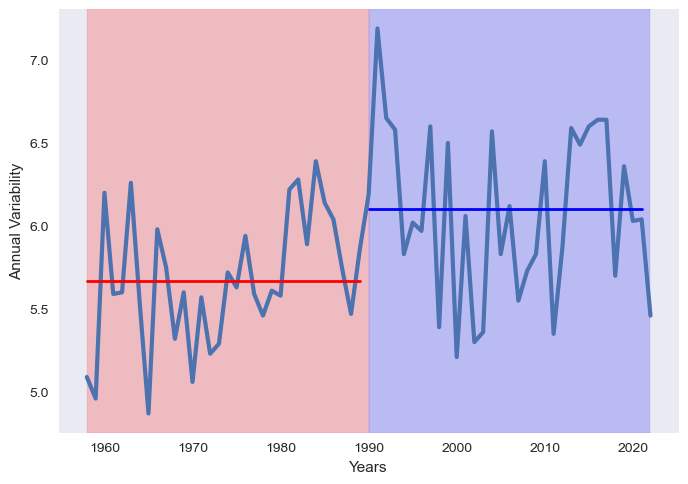

In [38]:
plt.plot(unique_years, annual_variability, linewidth = 3)
plt.plot(unique_years[0:half_year], first_half_mean_annual_variabilty, linewidth = 2, color = 'r')
plt.plot(unique_years[half_year: len(unique_years)-1], second_half_mean_annual_variabilty, linewidth = 2, color = 'b')
plt.xlabel('Years')
plt.ylabel('Annual Variability')
plt.style.use('seaborn')
plt.grid()
plt.axvspan(unique_years[0], unique_years[half_year], color='red', alpha=0.2)
plt.axvspan(unique_years[half_year], unique_years[len(unique_years)-1], color='blue', alpha=0.2)
plt.show()

### Is the difference significant at the 95% confidence limits?

In [39]:
#calculation of confidence level interval
z = 1.96 # z factor for 95% confidence level is 1.96

values = annual_variability[0:half_year]
mean = statistics.mean(values)
stdev = statistics.stdev(values)
confidence_interval_1 = z * stdev / sqrt(len(values))
print(f"confidence interval of first of annual variability = {confidence_interval_1}.")

confidence interval of first of annual variability = 0.13785148373354658.


In [40]:
values = annual_variability[half_year:len(unique_years)-1]
mean = statistics.mean(values)
stdev = statistics.stdev(values)
confidence_interval_2 = z * stdev / sqrt(len(values))
print(f"confidence interval of second of annual variability = {confidence_interval_2}.")

confidence interval of second of annual variability = 0.1725489093239091.


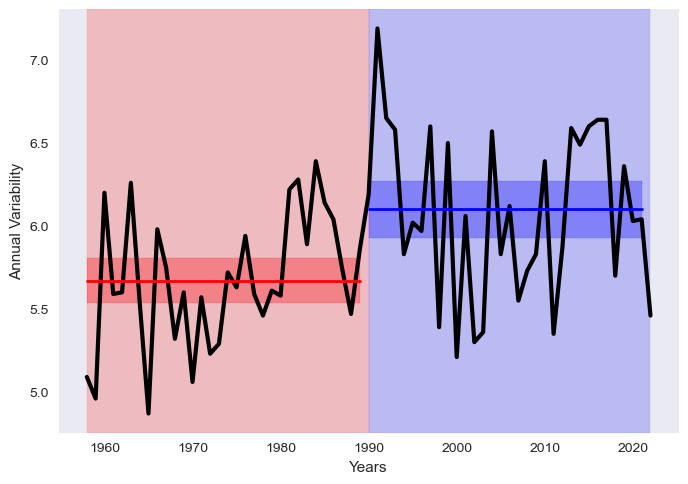

In [41]:
plt.plot(unique_years, annual_variability, linewidth = 3, color = 'black')

plt.plot(unique_years[0:half_year], first_half_mean_annual_variabilty, linewidth = 2, color = 'r')
plt.fill_between(unique_years[0:half_year], 
                 (first_half_mean_annual_variabilty[0] - confidence_interval_1),
                 (first_half_mean_annual_variabilty[0] + confidence_interval_1),
                 color = 'r', alpha = 0.3)

plt.plot(unique_years[half_year: len(unique_years)-1], second_half_mean_annual_variabilty, linewidth = 2, color = 'b')
plt.fill_between(unique_years[half_year: len(unique_years)-1],
                 (second_half_mean_annual_variabilty[0] - confidence_interval_2),
                 (second_half_mean_annual_variabilty[0] + confidence_interval_2),
                 color = 'b', alpha = 0.3)

plt.grid()  ###### if I remove it, why grid appears?/?????????????


plt.xlabel('Years')
plt.ylabel('Annual Variability')
plt.style.use('seaborn')
plt.axvspan(unique_years[0], unique_years[half_year], color='red', alpha=0.2)
plt.axvspan(unique_years[half_year], unique_years[len(unique_years)-1], color='blue', alpha=0.2)
plt.show()

### Question 2: Remove the “noise” in the data associated with the long term rise in CO2 concentration. You can do this by fitting a polynomial to the data. Try a first order (linear), second order (quadratic) and higher order fits (maybe to 5th order) and describe how this changes your results.

## **Linear regression fitting**

In [42]:
from sklearn.linear_model import LinearRegression

x = np.array(unique_years)                        # unique_years is the x array which is going to act as input
y = np.array(annual_variability)                  # annual_variability is the variable to be predicted

model = LinearRegression()

model.fit(x.reshape(-1,1),y)                      # x has to be converted to 2d array if not already

y_regression = model.predict(x.reshape(-1,1))     # x has to be converted to 2d array if its 1d array.

# plt.scatter(x,y)

# plt.plot(unique_years, y_regression)

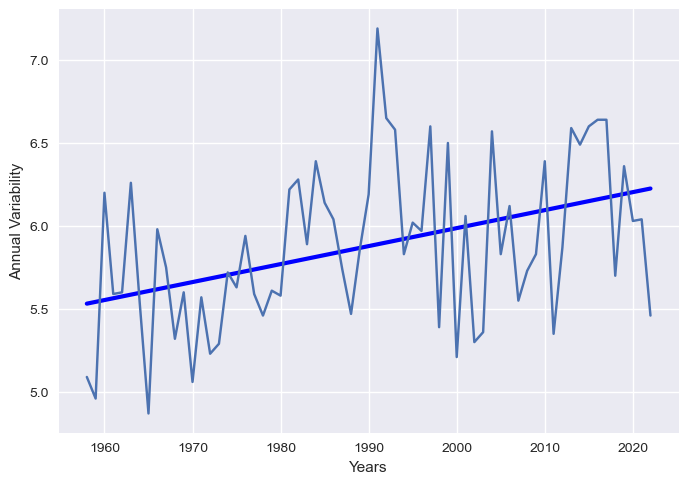

In [43]:
plt.plot(unique_years, y_regression, linewidth=3, color = 'b')
# plt.scatter(x,y)
plt.plot(unique_years, annual_variability)
plt.xlabel('Years')
plt.ylabel('Annual Variability')
# plt.axhline(y=annual_variability.mean(), color = 'g', linestyle = ':', linewidth = 3 )
plt.show()

In [44]:
annual_variability.mean()

5.878615384615383

In [45]:
statistics.stdev(annual_variability[half_year: len(unique_years)-1])

0.4980020566093013

 ## **Second order polynomial fit**

In [ ]:
x = np.array(keeling_curve['Year'])

In [ ]:
x = x.astype(int)#changing data type from object to int because polyfit only take numeric data type as input

In [ ]:
y = np.array(keeling_curve['Monthly mean CO2 concentration'])

In [ ]:
x = y.astype(int) #changing data type from object to int because polyfit only take numeric data type as input

In [ ]:
second_order_fit = np.polyfit(x, y, deg = 2)
second_order_fit

array([8.53753795e-06, 9.93413156e-01, 1.74482278e+00])

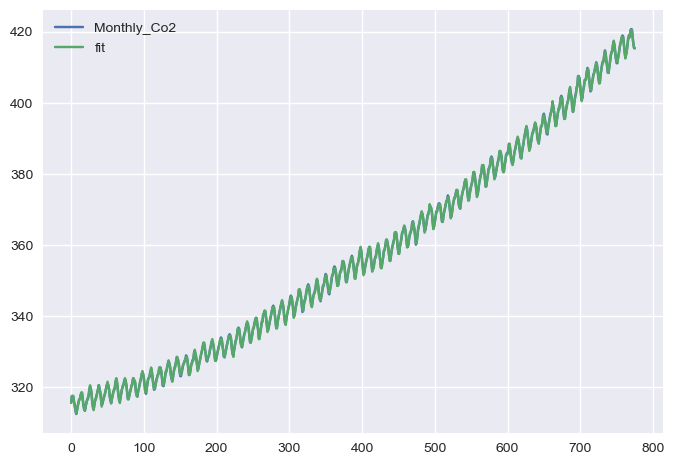

In [ ]:
fig, ax = plt.subplots()
ax.plot(y, label='Monthly_Co2')
ax.plot(np.polyval(second_order_fit, x), label='fit')
ax.legend()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
# convert year and month into a single datetime column
df = pd.to_datetime(keeling_curve['Year'].astype(str) + '-' + keeling_curve['Months'].astype(str), format='%Y-%m')
df

2     1958-03-01
3     1958-04-01
4     1958-05-01
5     1958-06-01
6     1958-07-01
         ...    
773   2022-06-01
774   2022-07-01
775   2022-08-01
776   2022-09-01
777   2022-10-01
Length: 776, dtype: datetime64[ns]

In [ ]:
# extract the year and month from the datetime column
df = df['Year_.dt.year + df['Year_Month'].dt.month/12

 ## **Third order polynomial fit**

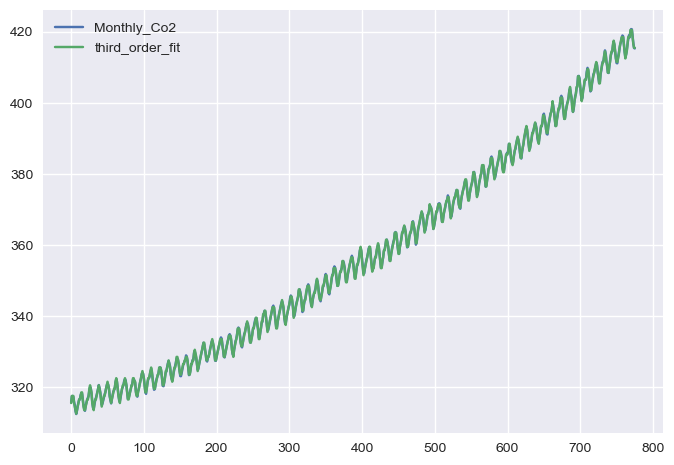

In [52]:
third_order_fit = np.polyfit(x, y, deg = 3)
fig, ax = plt.subplots()
ax.plot(y, label='Monthly_Co2')
ax.plot(np.polyval(third_order_fit, x), label='third_order_fit')
ax.legend()

 ## **Fourth order polynomial fit**

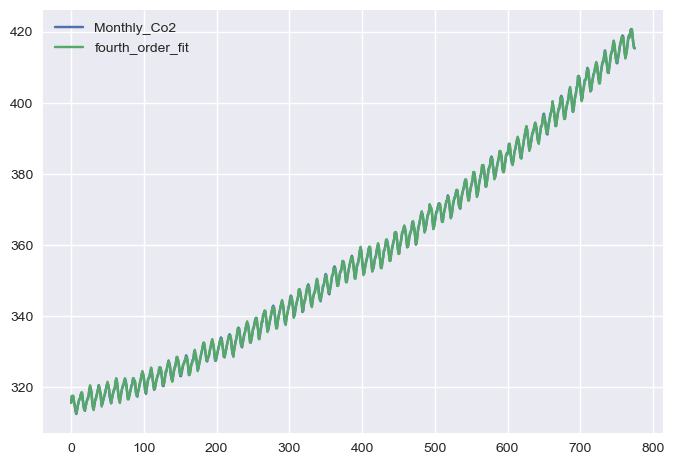

In [53]:
fourth_order_fit = np.polyfit(x, y, deg = 4)
fig, ax = plt.subplots()
ax.plot(y, label='Monthly_Co2')
ax.plot(np.polyval(fourth_order_fit, x), label='fourth_order_fit')
ax.legend()

 ## **Fifth order polynomial fit**

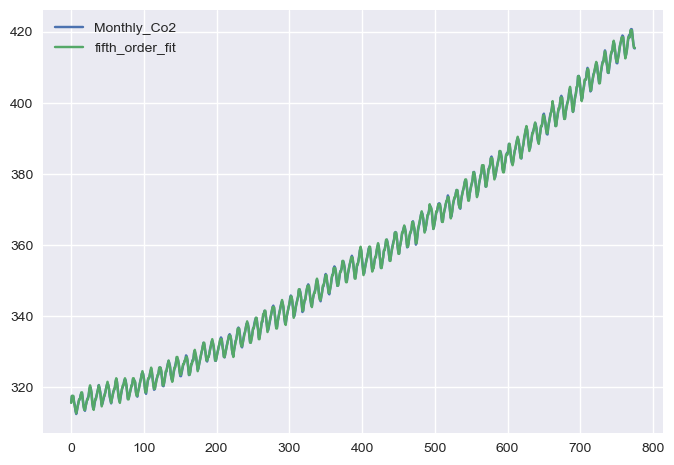

In [54]:
fifth_order_fit = np.polyfit(x, y, deg = 5)
fig, ax = plt.subplots()
ax.plot(y, label='Monthly_Co2')
ax.plot(np.polyval(fifth_order_fit, x), label='fifth_order_fit')
ax.legend()

### Calculation of Bin size using Freedman-Diaconis rule

In [55]:
# sample data
data = keeling_curve['Monthly mean CO2 concentration']

# calculate the interquartile range (IQR)
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25

# calculate the bin size
bin_size = 2 * iqr * (len(data) ** (-1/3))

# number of bins can be calculated by (max - min) / bin_size
number_of_bins = int((max(data) - min(data)) / bin_size)

print("bin size: ", bin_size)
print("number of bins: ", number_of_bins)


bin size:  11.39029530491617
number of bins:  9


## Ploting Histogram - Negetive Skewed Curve- What can we Infer?

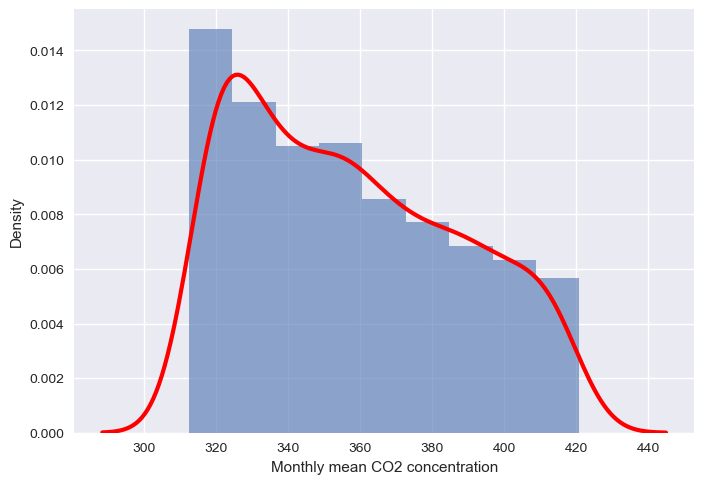

In [56]:
import seaborn as sns
plt.hist(keeling_curve['Monthly mean CO2 concentration'], bins= number_of_bins, density=True, alpha = 0.6)
sns.kdeplot(data, linewidth = 3, color = 'r')
plt.show()

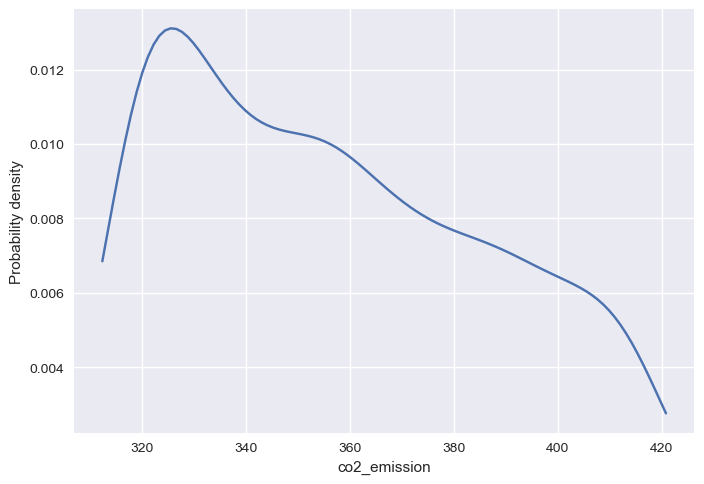

In [57]:
from scipy.stats import gaussian_kde

# Extract the co2 emmision values
data = keeling_curve['Monthly mean CO2 concentration'].values

# Estimate the PDF
kde = gaussian_kde(data)

# Generate x-coordinates to evaluate the PDF at
x = np.linspace(min(data), max(data), 100)

# Evaluate the PDF
y = kde(x)

# Plot the PDF
plt.plot(x, y)
plt.xlabel('co2_emission')
plt.ylabel('Probability density')
plt.show()


## Removal of “noise” in the data associated with the long term rise in CO2 concentration

## Hypothesis Testing using Z-test